In [59]:
import numpy as np
from numpy.linalg import eig
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import Operator
from qiskit.quantum_info import SparsePauliOp

# Let's define the operator:

In [77]:
hamiltonian = SparsePauliOp.from_list(
    [("YZ", 0.3980), ("ZI", -0.3980), ("ZZ", -0.0113), ("XX", 0.1810)]
)

In [78]:
H = hamiltonian.to_matrix()
print(H)

[[-0.4093+0.j     0.    +0.j     0.    -0.398j  0.181 +0.j   ]
 [ 0.    +0.j    -0.3867+0.j     0.181 +0.j     0.    +0.398j]
 [ 0.    +0.398j  0.181 +0.j     0.4093+0.j     0.    +0.j   ]
 [ 0.181 +0.j     0.    -0.398j  0.    +0.j     0.3867+0.j   ]]


In [156]:
hamiltonian_operator = Operator(hamiltonian)
hamiltonian_operator.draw(output='latex')

<IPython.core.display.Latex object>

# Let's find eigenvalues using classical numpy linear algebra package:

In [70]:
e,v=eig(H)
print("Eigenvalues:", e)
print("Eigenvectors:\n", v)

Eigenvalues: [-0.70293039+6.24707871e-18j -0.45308083-7.57079461e-17j
  0.70293039-6.06797210e-18j  0.45308083+3.47628378e-17j]
Eigenvectors:
 [[ 6.49638715e-01+0.00000000e+00j -1.13885050e-18+6.65864932e-01j
   7.01111754e-18-3.30320834e-01j -1.59629506e-01-4.32331142e-17j]
 [-2.91446790e-16+6.01307531e-01j  7.03606721e-01+0.00000000e+00j
   3.27546851e-01-2.90500924e-17j -2.28717515e-17+1.89947086e-01j]
 [-3.02255009e-17-3.30320834e-01j  1.59629506e-01+8.31587415e-17j
   6.49638715e-01+0.00000000e+00j  1.18760305e-16-6.65864932e-01j]
 [-3.27546851e-01-1.37383111e-16j -1.35473761e-17+1.89947086e-01j
  -1.69472202e-17-6.01307531e-01j  7.03606721e-01+0.00000000e+00j]]


# ...or even find smallest eigenvalue with Qiskit wrapper over classical numpy eigensolver:

In [85]:
from qiskit_algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=hamiltonian)
minimal_eigenvalue = result.eigenvalue.real
print(minimal_eigenvalue)

-0.7029303944595313


# Now, let's use Estimator to calculate expectation value of the operator for random choise of parameters:

In [158]:
ansatz = EfficientSU2(hamiltonian.num_qubits)

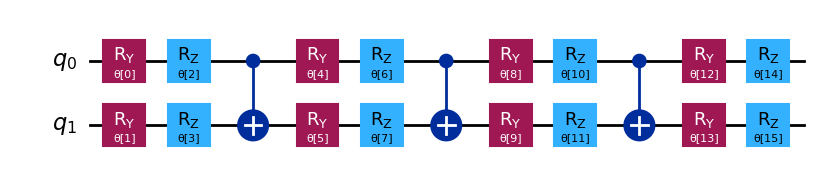

In [83]:
ansatz.decompose().draw("mpl")

In [84]:
num_params = ansatz.num_parameters
print(num_params)

16


In [47]:
print(hamiltonian.num_qubits)

2


In [150]:
estimator = Estimator()
initial_parameters = 2 * np.pi * np.random.random(num_params)
minimal_eigenvalue=estimator.run(ansatz, hamiltonian, parameter_values=initial_parameters).result().values[0]
print(minimal_eigenvalue)

0.24176803360629529


# Now let's use VQE algorithm to find values of parameters corresponding to the minimal expectation value of our operator and this minimal value itself:

In [ ]:
optimizer = SLSQP(maxiter=1000)

In [74]:
vqe = VQE(estimator, ansatz, optimizer)

In [75]:
result = vqe.compute_minimum_eigenvalue(hamiltonian)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 170,
    'eigenvalue': -0.7029303562892977,
    'optimal_circuit': <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x000001F520B22E10>,
    'optimal_parameters': {   ParameterVectorElement(θ[1]): -1.2433865093525096,
                              ParameterVectorElement(θ[0]): -1.9645178471488531,
                              ParameterVectorElement(θ[2]): -1.2415874984727762,
                              ParameterVectorElement(θ[3]): -2.036050497885998,
                              ParameterVectorElement(θ[4]): -2.9927958149445186,
                              ParameterVectorElement(θ[5]): 1.5820760228301491,
                              ParameterVectorElement(θ[6]): -0.6194636997727874,
                              ParameterVectorElement(θ[7]): 0.21536011765951743,
                              ParameterVectorElement(θ[8]): -2.3688867439844365,
                              ParameterVectorElement

# Exercise 1
Change the ansatz to the below one, visualize it and check how if the eigenvalue is still correctly found:

In [157]:
new_ansatz = TwoLocal(num_qubits, "ry", "cz")

# Exercise 2:
Using VQE algorithm calculate ground state energy of hydrogen molecule described by the below Hamiltonian.\
Use the first ansatz we used above - not the one from Exercise 1.\
Check in the internet if the result is correct and deduce in what units it is expressed.

In [153]:
H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

# Homework:

Run the VQE algorithm for operator from Exercise 2 on real quantum computer.
Note that currently all circuits need to be transpiled before sending to quantum computers, so you need to do this first.
Check how the minimal eigenvalue differs from the one obtained on simulator.

For references and to read more, you can explore the tutorials in Qiskit documentation - like this one:\
https://qiskit-community.github.io/qiskit-algorithms/tutorials/03_vqe_simulation_with_noise.html